## Import Libraries

In [1]:
#Data
import pandas as pd
import numpy as np

#Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#Label Encoder
from sklearn import preprocessing

#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Metriks Evaluasi
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

#Split data
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

#Grid Search
from sklearn.model_selection import GridSearchCV

#SMOTE
from imblearn.over_sampling import SMOTE


## Import Dataset

In [2]:
df = pd.read_csv('water_potability.csv')
df=df.rename(columns={"Organic_carbon": "carbon","Hardness":"hard","Chloramines":"chloramines","Solids":"solid","Sulfate":"sulfate","Conductivity":"conduct","Trihalomethanes":"thm","Turbidity":"turbidity","Potability":"potability"})
df

,ph,hard,solid,chloramines,sulfate,conduct,carbon,thm,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Info Dataset

In [3]:
df.shape

(3276, 10)

In [4]:
df.dtypes

ph             float64
hard           float64
solid          float64
chloramines    float64
sulfate        float64
conduct        float64
carbon         float64
thm            float64
turbidity      float64
potability       int64
dtype: object

In [5]:
df.describe()

,ph,hard,solid,chloramines,sulfate,conduct,carbon,thm,turbidity,potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Handling Missing Value

### Check Missing value

In [6]:
#Mencari missing value
total_missing = df.isnull().sum()
missing_1 = total_missing / (df.isnull().count() * 100)
missing_1 = round(missing_1, 1)
missing_df = pd.concat([total_missing, missing_1], axis=1, keys=['Total Missing', 'Percentage'])
missing_df

,Total Missing,Percentage
ph,491,0.0
hard,0,0.0
solid,0,0.0
chloramines,0,0.0
sulfate,781,0.0
conduct,0,0.0
carbon,0,0.0
thm,162,0.0
turbidity,0,0.0
potability,0,0.0


### Fill missing value with Mean

In [7]:
''' preparing data for model '''
ph_mean = df[df['potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_mean

ph_mean_1 = df[df['potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_mean_1

sulf_mean = df[df['potability'] == 0]['sulfate'].mean(skipna=True)
df.loc[(df['potability'] == 0) & (df['sulfate'].isna()), 'sulfate'] = sulf_mean

sulf_mean_1 = df[df['potability'] == 1]['sulfate'].mean(skipna=True)
df.loc[(df['potability'] == 1) & (df['sulfate'].isna()), 'sulfate'] = sulf_mean_1

traih_mean = df[df['potability'] == 0]['thm'].mean(skipna=True)
df.loc[(df['potability'] == 0) & (df['thm'].isna()), 'thm'] = traih_mean

trah_mean_1 = df[df['potability'] == 1]['thm'].mean(skipna=True)
df.loc[(df['potability'] == 1) & (df['thm'].isna()), 'thm'] = trah_mean_1

In [8]:
#Mencari missing value
total_missing = df.isnull().sum()
missing_1 = total_missing / (df.isnull().count() * 100)
missing_1 = round(missing_1, 1)
missing_df = pd.concat([total_missing, missing_1], axis=1, keys=['Total Missing', 'Percentage'])
missing_df

,Total Missing,Percentage
ph,0,0.0
hard,0,0.0
solid,0,0.0
chloramines,0,0.0
sulfate,0,0.0
conduct,0,0.0
carbon,0,0.0
thm,0,0.0
turbidity,0,0.0
potability,0,0.0


## Check Correlation

<AxesSubplot:>

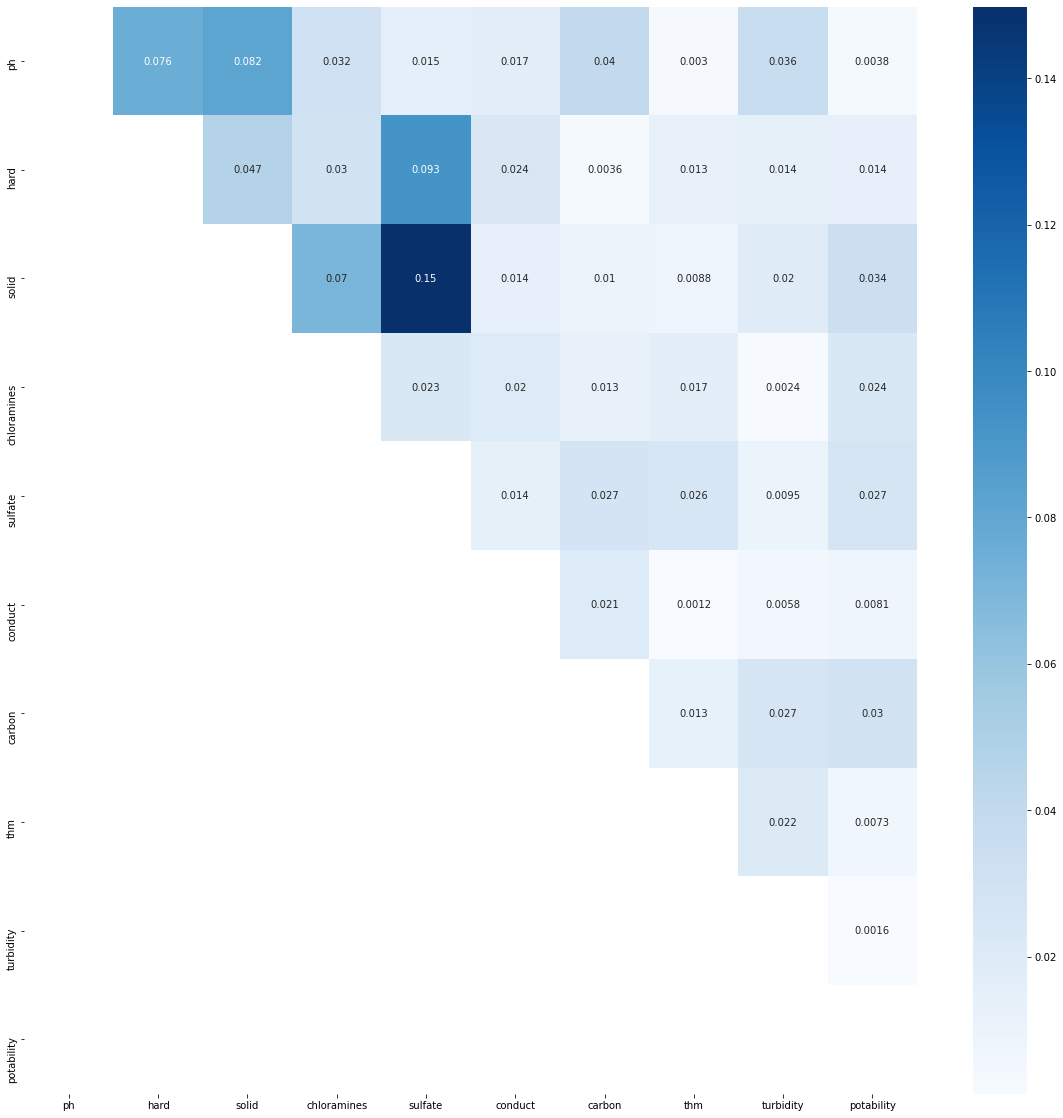

In [9]:
corr = df.corr().abs()

#ambil bagian segitiga atas dari correlation matrix
atas = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

plt.figure(figsize=(20, 20))
sns.heatmap(atas, annot=True, cmap='Blues')

In [10]:
#Mengganti keseluruhan data ke bentuk float agar lebih detail
df = df.astype(float)
print(df.dtypes)

ph             float64
hard           float64
solid          float64
chloramines    float64
sulfate        float64
conduct        float64
carbon         float64
thm            float64
turbidity      float64
potability     float64
dtype: object


In [11]:
''' independent and dependent features '''
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [12]:
X.shape

(3276, 9)

In [13]:
y.shape

(3276,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (1965, 9)
X_test shape:  (1311, 9)


In [15]:
''"""''' standard scaler '''
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""''

"''' standard scaler '''\nfrom sklearn.preprocessing import StandardScaler\n\nsc = StandardScaler()\n\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)"

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.svm import LinearSVC,NuSVC,SVC

In [17]:
## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier,
            MLPClassifier,SGDClassifier,LinearSVC,NuSVC,SVC]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier',
             'MLPClassifier',
             'SGDClassifier',
             'LinearSVC','NuSVC','SVC']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]


for idx, model_type in enumerate(all_model):
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    
    model = model_type()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    AccTrain.append(model.score(X_train , y_train))
    AccTest.append(model.score(X_test , y_test))
    RecallTemp.append(recall_score(y_test,y_pred))
    PrecisionTemp.append(precision_score(y_test,y_pred))
    AucTemp.append(roc_auc_score(y_test, y_pred))

    
    print("----------Hasil Akhir per Algoritma------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------Hasil Akhir per Algoritma------------
DecisionTreeClassifier Acc Train: 1.0
DecisionTreeClassifier Acc Test: 0.7467581998474447
DecisionTreeClassifier Recall: 0.6551724137931034
DecisionTreeClassifier Precission: 0.6659793814432989
DecisionTreeClassifier AUC: 0.7285642020065762
---------------------------
----------Hasil Akhir per Algoritma------------
LogisticRegression Acc Train: 0.6005089058524173
LogisticRegression Acc Test: 0.623951182303585
LogisticRegression Recall: 0.0
LogisticRegression Precission: 0.0
LogisticRegression AUC: 0.5
---------------------------


C:\Users\OMEN\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------Hasil Akhir per Algoritma------------
KNeighborsClassifier Acc Train: 0.7099236641221374
KNeighborsClassifier Acc Test: 0.5491990846681922
KNeighborsClassifier Recall: 0.2920892494929006
KNeighborsClassifier Precission: 0.37305699481865284
KNeighborsClassifier AUC: 0.49812286435525227
---------------------------
----------Hasil Akhir per Algoritma------------
GaussianNB Acc Train: 0.6244274809160305
GaussianNB Acc Test: 0.6369183829138062
GaussianNB Recall: 0.2210953346855984
GaussianNB Precission: 0.5422885572139303
GaussianNB AUC: 0.5543129485163933
---------------------------
----------Hasil Akhir per Algoritma------------
RandomForestClassifier Acc Train: 1.0
RandomForestClassifier Acc Test: 0.7856598016781083
RandomForestClassifier Recall: 0.6166328600405679
RandomForestClassifier Precission: 0.7676767676767676
RandomForestClassifier AUC: 0.7520817111938782
---------------------------
----------Hasil Akhir per Algoritma------------
GradientBoostingClassifier Acc Train: 0

C:\Users\OMEN\Miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


----------Hasil Akhir per Algoritma------------
XGBClassifier Acc Train: 1.0
XGBClassifier Acc Test: 0.7848970251716247
XGBClassifier Recall: 0.6632860040567952
XGBClassifier Precission: 0.7381489841986456
XGBClassifier AUC: 0.760738356551625
---------------------------
----------Hasil Akhir per Algoritma------------
MLPClassifier Acc Train: 0.3984732824427481
MLPClassifier Acc Test: 0.37757437070938216
MLPClassifier Recall: 0.9797160243407708
MLPClassifier Precission: 0.37470907680372384
MLPClassifier AUC: 0.49719297549556873
---------------------------
----------Hasil Akhir per Algoritma------------
SGDClassifier Acc Train: 0.6005089058524173
SGDClassifier Acc Test: 0.623951182303585
SGDClassifier Recall: 0.0
SGDClassifier Precission: 0.0
SGDClassifier AUC: 0.5
---------------------------


C:\Users\OMEN\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OMEN\Miniconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


----------Hasil Akhir per Algoritma------------
LinearSVC Acc Train: 0.3994910941475827
LinearSVC Acc Test: 0.37604881769641496
LinearSVC Recall: 1.0
LinearSVC Precission: 0.37604881769641496
LinearSVC AUC: 0.5
---------------------------
----------Hasil Akhir per Algoritma------------
NuSVC Acc Train: 0.45648854961832064
NuSVC Acc Test: 0.45537757437070936
NuSVC Recall: 0.5801217038539553
NuSVC Precission: 0.36065573770491804
NuSVC AUC: 0.4801586514379801
---------------------------
----------Hasil Akhir per Algoritma------------
SVC Acc Train: 0.6005089058524173
SVC Acc Test: 0.623951182303585
SVC Recall: 0.0
SVC Precission: 0.0
SVC AUC: 0.5
---------------------------


C:\Users\OMEN\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Membandingkan setiap model

In [18]:
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
5,GradientBoostingClassifier,0.864631,0.794813,0.823699,0.578093,0.751761,0.069818
4,RandomForestClassifier,1.000000,0.785660,0.767677,0.616633,0.752082,0.214340
7,XGBClassifier,1.000000,0.784897,0.738149,0.663286,0.760738,0.215103
0,DecisionTreeClassifier,1.000000,0.746758,0.665979,0.655172,0.728564,0.253242
6,ExtraTreesClassifier,1.000000,0.702517,0.697318,0.369168,0.636296,0.297483
3,GaussianNB,0.624427,0.636918,0.542289,0.221095,0.554313,0.012491
1,LogisticRegression,0.600509,0.623951,0.000000,0.000000,0.500000,0.023442
9,SGDClassifier,0.600509,0.623951,0.000000,0.000000,0.500000,0.023442
12,SVC,0.600509,0.623951,0.000000,0.000000,0.500000,0.023442
2,KNeighborsClassifier,0.709924,0.549199,0.373057,0.292089,0.498123,0.160725


# Tanpa Parameter Terbaik

In [70]:
X_train = X_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

### Split Data Menjadi Train dan Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2222)

### Training dan Testing Model

In [19]:
#Training

modeltun = GradientBoostingClassifier()
model_fit = modeltun.fit(X_train,y_train)
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      1180
         1.0       0.94      0.71      0.81       785

    accuracy                           0.86      1965
   macro avg       0.89      0.84      0.85      1965
weighted avg       0.88      0.86      0.86      1965



Confusion Matrix: [[1145  231]
 [  35  554]]


<AxesSubplot:>

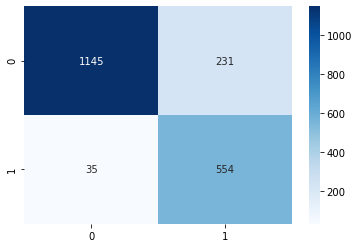

In [20]:
cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion Matrix: {}'.format(cm_train))

## visualisasi
sns.heatmap(cm_train, annot=True, fmt='', cmap="Blues")

In [21]:
df.head(1)

,ph,hard,solid,chloramines,sulfate,conduct,carbon,thm,turbidity,potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135,0.0


In [22]:
#Testing
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       818
         1.0       0.82      0.58      0.68       493

    accuracy                           0.79      1311
   macro avg       0.80      0.75      0.76      1311
weighted avg       0.80      0.79      0.79      1311



In [23]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.48%


Confusion Matrix: [[757 208]
 [ 61 285]]


<AxesSubplot:>

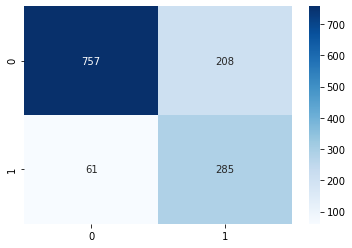

In [24]:
cm_test = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix: {}'.format(cm_test))
## visualisasi
sns.heatmap(cm_test, annot=True, fmt='', cmap="Blues")

## Predict data

In [25]:
a = [[7.874671,195.102299,17404.177061,7.509306,332.566990,327.459760,16.140368,78.698446,2.309149]]
a = np.asarray(a)
a

array([[7.87467100e+00, 1.95102299e+02, 1.74041771e+04, 7.50930600e+00,
        3.32566990e+02, 3.27459760e+02, 1.61403680e+01, 7.86984460e+01,
        2.30914900e+00]])

In [26]:
import pickle
with open('dump.pkl', 'wb') as f:
        pickle.dump(model_fit, f)


In [78]:
#a = np.asarray(a)
hasil = model_fit.predict(a)
hasil

array([1.])

### Export Model

In [79]:
import joblib

In [90]:
import joblib
joblib.dump(model_fit, "model_GB.pkl")
classifer = joblib.load("model_GB.pkl")


In [91]:
df

,ph,hard,solid,chloramines,sulfate,conduct,carbon,thm,turbidity,potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,66.539684,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1.0


In [82]:
import pickle
pickle.dump(model_fit, open("model_GradientBoostingClassifier.pickle.dat", "wb"))

In [83]:
# load model from file
loaded_model = pickle.load(open("model_GradientBoostingClassifier.pickle.dat", "rb"))
# make predictions for test data
y_pred = loaded_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.41%


C:\Users\OMEN\Miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [84]:
np.savetxt("X_test.csv", X_test, delimiter=",")

In [85]:
np.savetxt("y_test.csv", y_test, delimiter=",")